
# Logistic Regression ***- LIC Stock Price Movement Classification***

## 24BAD102 SaiSanjay R

## ***Scenario - 2***

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("debashis74017/lic-stock-price-data")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'lic-stock-price-data' dataset.
Path to dataset files: /kaggle/input/lic-stock-price-data


In [4]:

df = pd.read_csv("/kaggle/input/lic-stock-price-data/LICI - 10 minute data.csv")
df.head()


,date,open,high,low,close,volume
0,2022-05-17 09:35:00+05:30,872.00,872.00,872.0,872.00,3759243
1,2022-05-17 09:45:00+05:30,872.00,872.00,872.0,872.00,0
2,2022-05-17 09:55:00+05:30,872.00,918.10,862.0,902.80,12449251
3,2022-05-17 10:05:00+05:30,902.45,908.95,896.0,902.15,5237329
4,2022-05-17 10:15:00+05:30,902.30,905.00,900.0,903.85,1820317


## Create Binary Target Variable

In [6]:

df['Price Movement'] = np.where(df['close'] > df['open'], 1, 0)
df.head()


,date,open,high,low,close,volume,Price Movement
0,2022-05-17 09:35:00+05:30,872.00,872.00,872.0,872.00,3759243,0
1,2022-05-17 09:45:00+05:30,872.00,872.00,872.0,872.00,0,0
2,2022-05-17 09:55:00+05:30,872.00,918.10,862.0,902.80,12449251,1
3,2022-05-17 10:05:00+05:30,902.45,908.95,896.0,902.15,5237329,0
4,2022-05-17 10:15:00+05:30,902.30,905.00,900.0,903.85,1820317,1


## Handle Missing Values

In [7]:

print(df.isnull().sum())
df.dropna(inplace=True)


date              0
open              0
high              0
low               0
close             0
volume            0
Price Movement    0
dtype: int64


##  Select Input Features

In [9]:

X = df[['open', 'high', 'low', 'volume']]
y = df['Price Movement']


## Feature Scaling

In [10]:

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


##  Train-Test Split

In [11]:

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)


##  Train Logistic Regression Model

In [19]:

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


## Predict Stock Movement

In [13]:

y_pred = model.predict(X_test)


## Evaluate Classification Performance

Accuracy : 0.6132971506105834
Precision: 1.0
Recall   : 0.030612244897959183
F1 Score : 0.0594059405940594


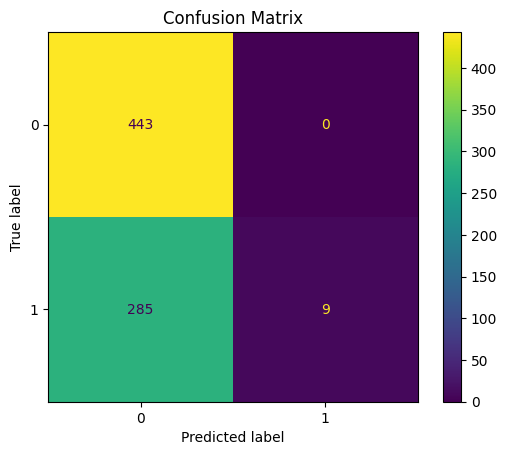

In [14]:

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy :", accuracy)
print("Precision:", precision)
print("Recall   :", recall)
print("F1 Score :", f1)

cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()
plt.title("Confusion Matrix")
plt.show()


##  ROC Curve Visualization

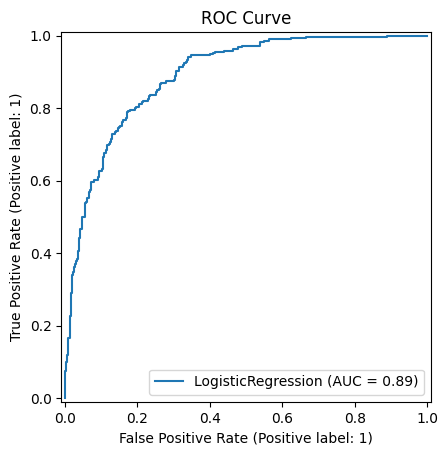

In [15]:

RocCurveDisplay.from_estimator(model, X_test, y_test)
plt.title("ROC Curve")
plt.show()


##  Feature Importance Visualization

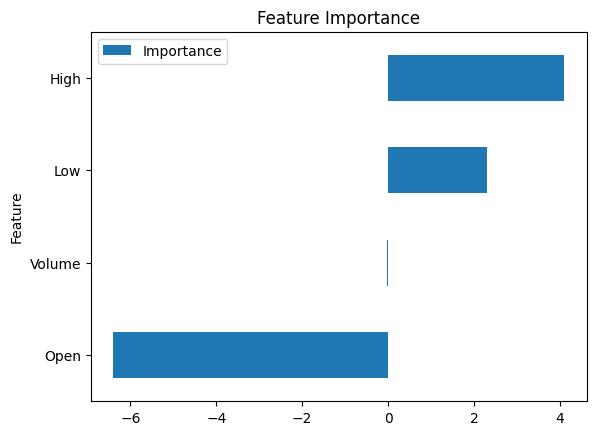

In [16]:

importance = model.coef_[0]

feature_importance = pd.DataFrame({
    'Feature': ['Open', 'High', 'Low', 'Volume'],
    'Importance': importance
})

feature_importance.sort_values(by='Importance').plot(
    x='Feature', y='Importance', kind='barh'
)

plt.title("Feature Importance")
plt.show()


## Hyperparameter Tuning

In [17]:

param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l2'],
    'solver': ['lbfgs']
}

grid = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)


Best Parameters: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}


## Train Optimized Model

In [18]:

best_model = grid.best_estimator_

y_pred_best = best_model.predict(X_test)

print("Optimized Accuracy:", accuracy_score(y_test, y_pred_best))


Optimized Accuracy: 0.7164179104477612
